# CA02 - Training Perceptron and Adaline models

#### Karin Mollatt

---

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the relevant classes from adaline.py and perceptron.py in the classifiers folder
from classifiers.adaline import AdalineGD
from classifiers.perceptron import Perceptron

## Loading and exploring data

First I visualise the raw data with violin- and scatterplots to inspect for possible outliers or inconsistencies, and observe if this can have an impact on the models afterwards. 

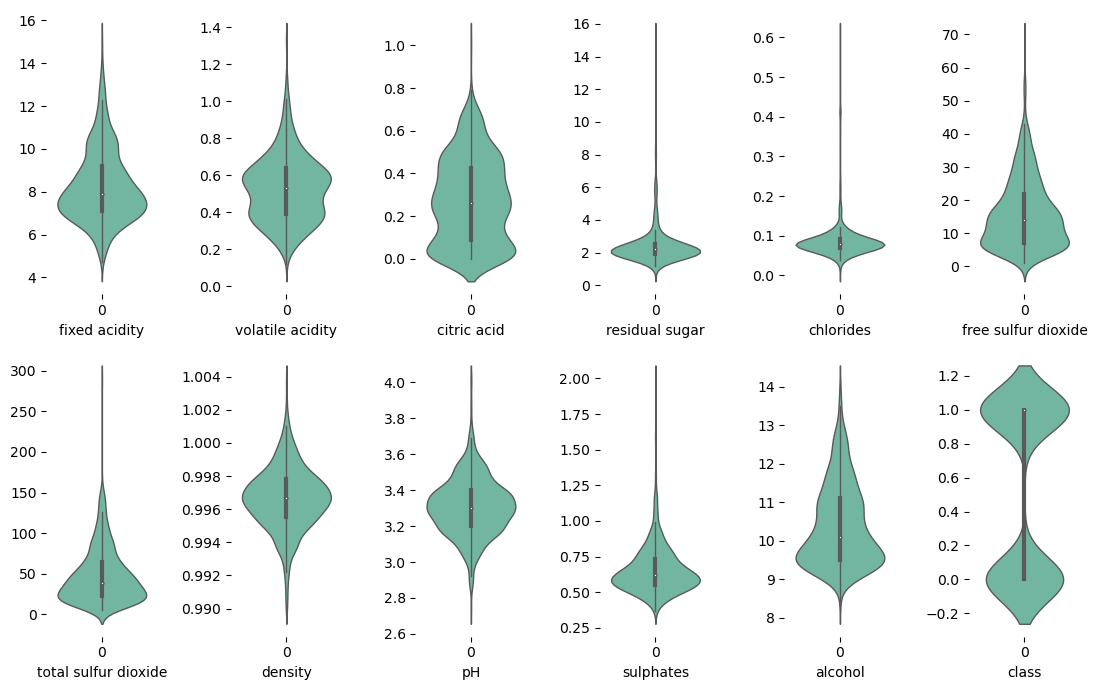

In [2]:
# loading data
df = pd.read_csv('assets/wine.csv')

# violinplot of each feature
row_no = 2
col_no = 6
subplot_no = 1

plt.figure(figsize=(11,7))

for col in df.columns:
    plt.subplot(row_no, col_no, subplot_no)
    plt.xlabel(col)
    sns.violinplot(data=df[col], scale='count', linewidth=1, palette='Set2')
    subplot_no = subplot_no + 1
    
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

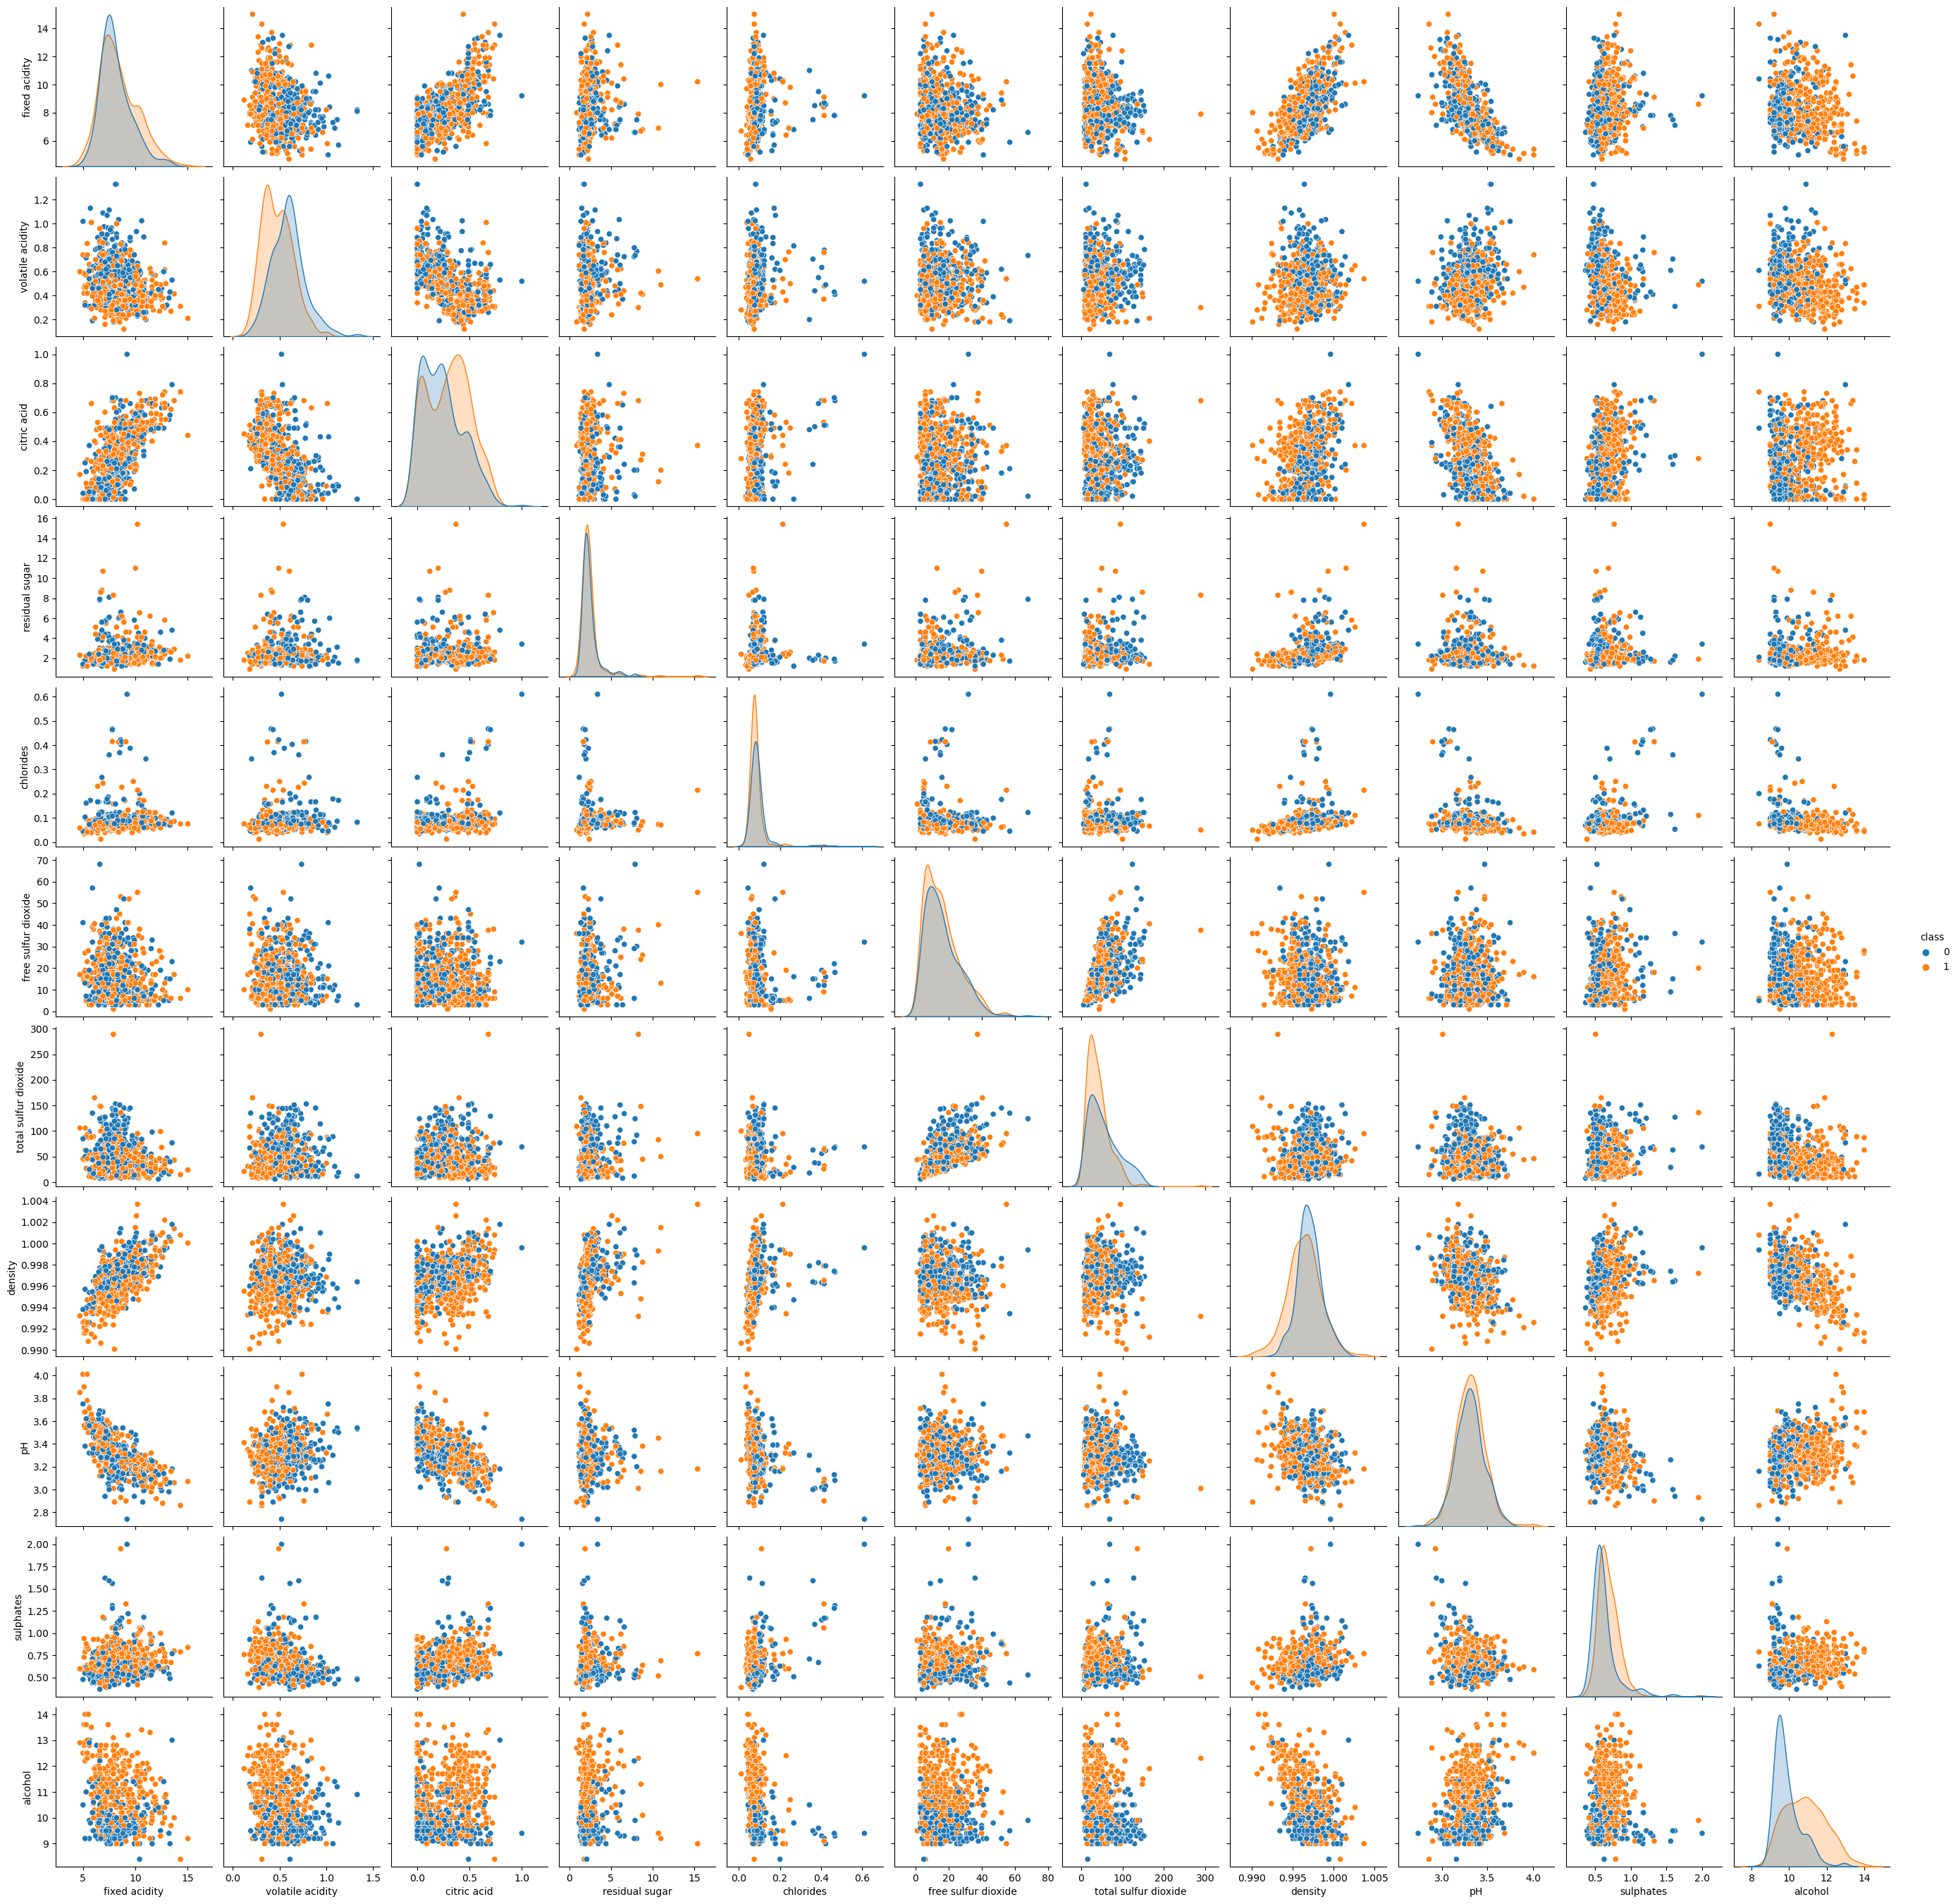

In [3]:
# pairplot
plt.figure()
sns.pairplot(df, hue='class')
plt.show()

The violin plot displays the distribution of all the features, and one can observe that it is skewed (with long tails) for `residual sugar`, `chlorides`, `free sulfur dioxide`, `total sulfur dioxide` and `sulphates`, which means that there must be outliers in the data.
From the pair plot one can observe how separable the data is, which in this case is not clear at all. When one has problems with linearly separating the data, this can lead to the training models not converging and iterating infinitely.

## Preprocessing data and training models

The data is splitted into training and test sets inside the for-loops because in this way we can subset the array of features directly from the raw dataframe. Since one knows that 400 of the samples should be used for training, one could have splitted the data first into training and test sets, and afterwards subseted from these dataframes.

After we have separated the data sets we change the classes from 0 and 1 to -1 and 1, to fit with the Perceptron and Adaline classifiers.

When the preprocessing of the data is finished, we initate the models, train them and predict the unseen samples. At last we compute the test set classification algorithm and store it in a nested list, which is then converted to a (8 x 50) pandas dataframe.

__Preprocessing and training:__

In [4]:
# empty lists to hold test accuracies for each subset
allTestAccPerc = []
allTestAccAda = []

for subset in range(50, 401, 50):
    
    # empty lists to hold test accuracies for each model
    accTestListPerc = []
    accTestListAda = []
    
    for epoch in range(1, 51):
        
        # separating into traning and test sets,
        # and extracting only values
        y_train = df.iloc[:subset, -1].values
        X_train = df.iloc[:subset, :-1].values
        y_test = df.iloc[400:, -1].values
        X_test = df.iloc[400:, :-1].values
        
        # converting class=0 to -1 and remain class=1 to 1
        y_train = np.where(y_train == 0, -1, 1)
        y_test = np.where(y_test == 0, -1, 1)
        
        # standardizing (scaling) X_train and X_test using mean & std of X_train
        X_mean = np.mean(X_train, axis=0)
        X_std = np.std(X_train, axis=0, ddof=1)
        
        X_train_sc = (X_train - X_mean) / X_std
        X_test_sc = (X_test - X_mean) / X_std
        
        # -----------------------
        # PERCEPTRON MODEL
        # -----------------------
    
        # initating Perceptron model
        perc = Perceptron(eta=0.0001, n_iter=epoch, random_state=1)
        
        # training Perceptron model
        perc.fit(X_train_sc, y_train)
        
        # predict classes
        y_pred_perc = perc.predict(X_test_sc)
        
        # no of misclassifications
        mis_perc = (y_test != y_pred_perc).sum()
        #print(f'Misclassified samples from Perceptron: {mis_perc}')
    
        # accuracy (fraction of correctly classified samples)
        perc_acc = ((len(y_test) - mis_perc) / len(y_test)) * 100
        #print(f'Accuracy of Perceptron model: {perc_acc:.4f}')
        
        # -----------------------
        # ADALINE MODEL
        # -----------------------
        
        # initating Adaline model
        ada = AdalineGD(eta=0.0001, n_iter=epoch, random_state=1)
        
        # training Adaline model
        ada.fit(X_train_sc, y_train)
        
        # predict classes
        y_pred_ada = ada.predict(X_test_sc)
        
        # no of misclassifications
        mis_ada = (y_test != y_pred_ada).sum()
        #print(f'Misclassified samples from Adaline: {mis_ada}')
    
        # accuracy (fraction of correctly classified samples)
        ada_acc = ((len(y_test) - mis_ada) / len(y_test)) * 100
        #print(f'Accuracy of Adaline model: {ada_acc:.4f}')
        
        # adding model accuracy to list
        accTestListPerc.append(perc_acc)
        accTestListAda.append(ada_acc)

    # adding accuracy for all models in a subset to list
    allTestAccPerc.append(accTestListPerc)
    allTestAccAda.append(accTestListAda)
    
# converting list to dataframe
df_allTestAccPerc = pd.DataFrame(allTestAccPerc)
df_allTestAccAda = pd.DataFrame(allTestAccAda)

## Visualizing results

To visualize the results of both models, two heatmaps were plotted - one for the Perceptron model, and one for the Adaline model.

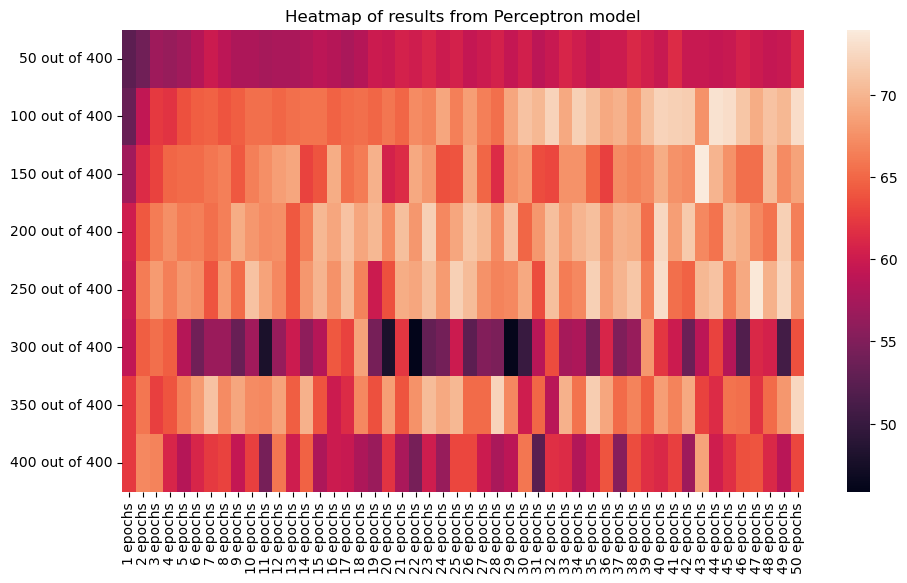

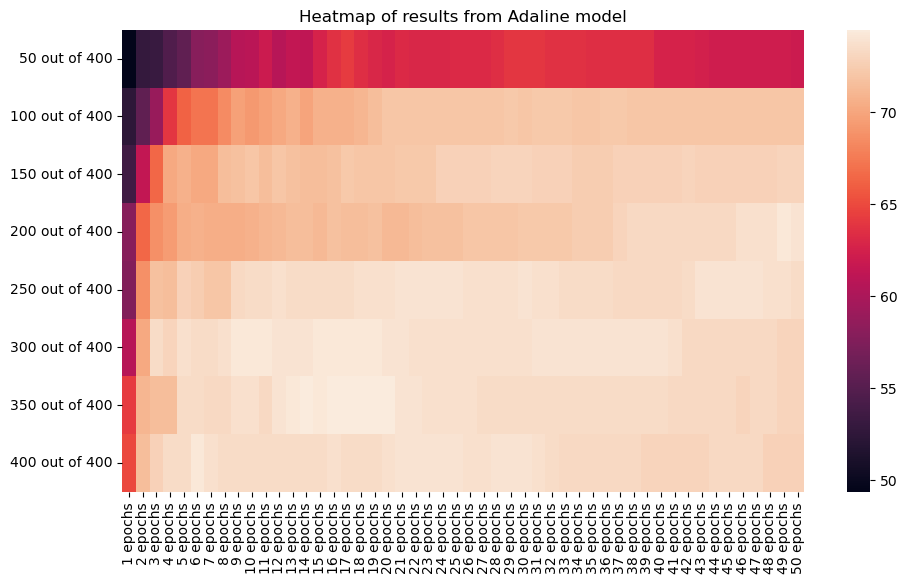

In [5]:
# heatmap of Perceptron algorithm
plt.figure(figsize=(11,6))
sns.heatmap(df_allTestAccPerc,
            xticklabels=[f'{no} epochs' for no in range(1, 51)],
            yticklabels=[f'{no_sam+50} out of {len(X_train)}'
                         for no_sam in range(0, 400, 50)])
plt.title('Heatmap of results from Perceptron model')
plt.show() 


# heatmap of Adaline algorithm
plt.figure(figsize=(11,6))
sns.heatmap(df_allTestAccAda,
            xticklabels=[f'{no} epochs' for no in range(1, 51)],
            yticklabels=[f'{no_sam+50} out of {len(X_train)}'
                         for no_sam in range(0, 400, 50)])
plt.title('Heatmap of results from Adaline model')
plt.show()

## Metrics

It is natural to be curious about which model achieved the highest test set classification accuracy. This maximum value is therefore identified, with its information on the combination of number of training data samples and number of epochs.

In [6]:
# maximum test set classification accuracy with information
maxAccPerc = np.max(allTestAccPerc)
maxAccAda = np.max(allTestAccAda)

# iterating through the nested lists, to find positions of max values
for idx, accList in enumerate(allTestAccPerc):
    if maxAccPerc in accList:
        print(f'Maximum test set classification accuracy for the Perceptron model:\n \
        Max accuracy: {maxAccPerc:.2f}%, \t which were achieved when\n \
        Number of training data samples: {(idx+1)*50} out of {len(X_train)}\n \
        with {accList.index(maxAccPerc)} epochs\n')
        
for idx, accList in enumerate(allTestAccAda):
    if maxAccAda in accList:
        print(f'Maximum test set classification accuracy for the Perceptron model:\n \
        Max accuracy: {maxAccAda:.2f}%, \t which were achieved when\n \
        Number of training data samples: {(idx+1)*50} out of {len(X_train)}\n \
        with {accList.index(maxAccAda)} epochs\n')

Maximum test set classification accuracy for the Perceptron model:
         Max accuracy: 73.93%, 	 which were achieved when
         Number of training data samples: 150 out of 400
         with 42 epochs

Maximum test set classification accuracy for the Perceptron model:
         Max accuracy: 74.44%, 	 which were achieved when
         Number of training data samples: 350 out of 400
         with 13 epochs



---

## Discussion

**The training time of the simpler perceptron algorithm is quite a bit longer than the training time of the adaline algorithm.** What might be the reason for this?

The reason for why the Perceptron algorithm takes a longer time for training might be because of the difference in weight updates. In the Perceptron algorithm the weights are updated through a unit step function after *each* sample. If the classification is wrong, the weights are updated, if not the weights stay the same. In the Adaline algorithm the weights are updated through an activation function, but this only happens at the end of an iteration. This can explain why the Perceptron algorithm takes a longer time for training, because there can be several misclassifications in the same epoch. 

---